Name: Siddharth Byale

Github username : sidb98

USC ID : 5284615575



In [1]:
#%pip install openpyxl
#%pip install statsmodels

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
df = pd.read_excel("../../data/CCPP/Folds5x2_pp.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.shape

(9568, 5)

## b) i)

There are 9568 rows and 5 columns.

Each rows represents a sample data point.

Out of 5 columns 4 of them are independent variables(Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)) while the last column ( (PE) is the net hourly electrical energy output) is a dependent variable

## ii)

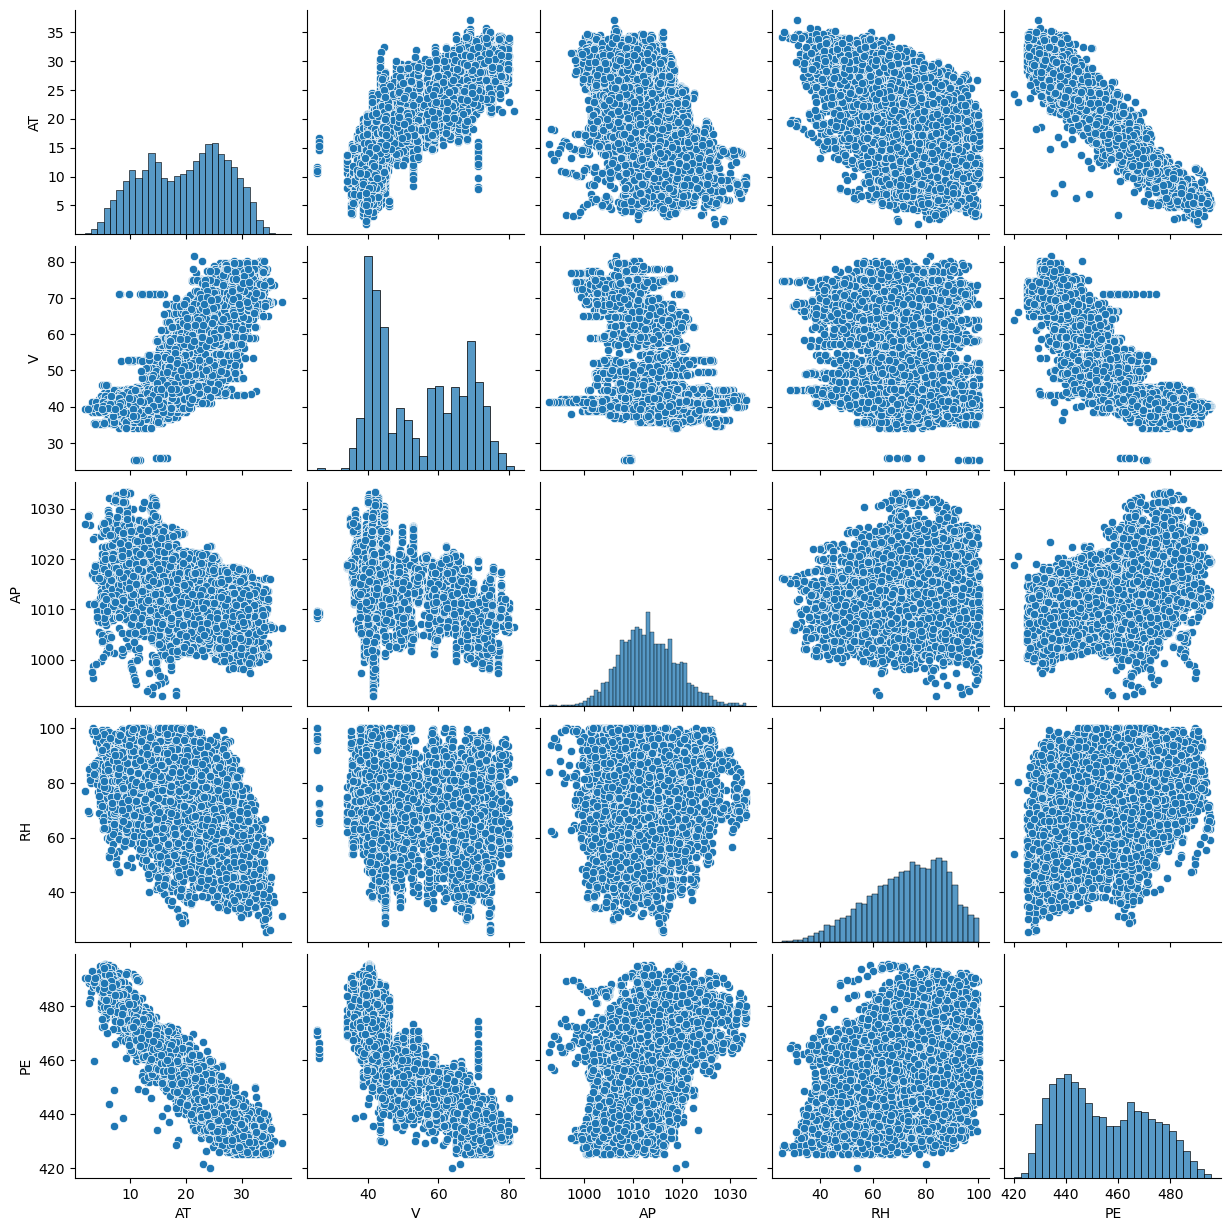

In [4]:
sns.pairplot(df)

## iii)

In [5]:
stat_data = df.describe()
stat_data.loc['IQR'] = stat_data.loc['75%'] - stat_data.loc['25%']
stat_data.loc['range'] = stat_data.loc['max'] - stat_data.loc['min']
stat_data = stat_data.rename(index={'50%': 'median', '25%':"first quartile", '75%':'third quartile'})
stat_data = stat_data.drop(['count', 'min', 'max', 'max', 'std'])

print(stat_data)


                       AT          V           AP         RH          PE
mean            19.651231  54.305804  1013.259078  73.308978  454.365009
first quartile  13.510000  41.740000  1009.100000  63.327500  439.750000
median          20.345000  52.080000  1012.940000  74.975000  451.550000
third quartile  25.720000  66.540000  1017.260000  84.830000  468.430000
IQR             12.210000  24.800000     8.160000  21.502500   28.680000
range           35.300000  56.200000    40.410000  74.600000   75.500000


## c)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:55:20   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

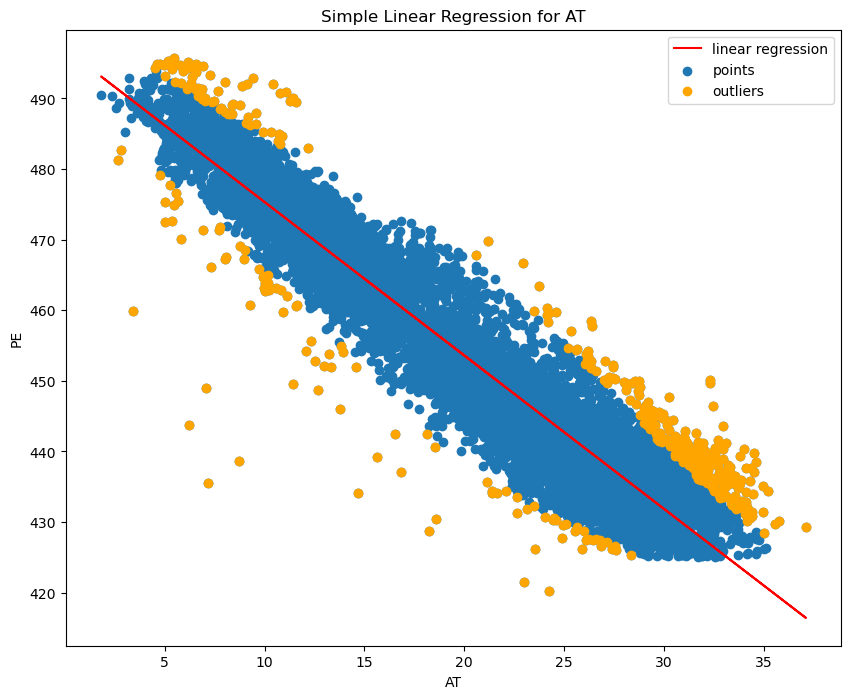

In [6]:
x1 = df['AT']
y = df['PE']
x1 =sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()

influence = model1.get_influence() 
cooks = influence.summary_frame()
outliers = cooks[cooks['cooks_d'] > 4/9568 ].index

predictions = model1.predict(x1) 
print_model = model1.summary()
print(print_model)

print("\nNo of outliers are", len(outliers))

x1 = df['AT']
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x1,predictions, color='red', label="linear regression")
ax.scatter(x1,y, label ="points")
ax.scatter(x1.iloc[outliers], y.iloc[outliers], color = "orange", label = "outliers")
ax.set_xlabel("AT")
ax.set_ylabel("PE")
ax.set_title("Simple Linear Regression for AT")
plt.legend(loc = "upper right")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:55:37   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

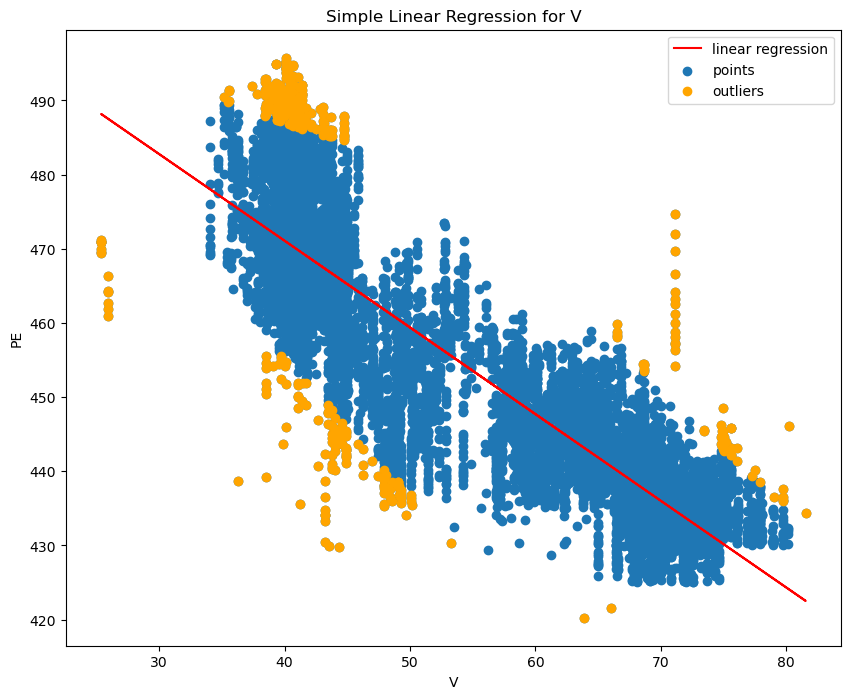

In [7]:
x2 = df['V']
y = df['PE']
x2 =sm.add_constant(x2)
model2 = sm.OLS(y,x2).fit()

influence = model2.get_influence() 
cooks = influence.summary_frame()
outliers = cooks[cooks['cooks_d'] > 4/9568 ].index

predictions = model2.predict(x2) 
print_model = model2.summary()
print(print_model)

print("\nNo of outliers are", len(outliers))

x2 = df['V']
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x2,predictions, color='red', label="linear regression")
ax.scatter(x2,y, label ="points")
ax.scatter(x2.iloc[outliers], y.iloc[outliers], color = "orange", label = "outliers")
ax.set_xlabel("V")
ax.set_ylabel("PE")
ax.set_title("Simple Linear Regression for V")
plt.legend(loc = "upper right")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:55:53   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

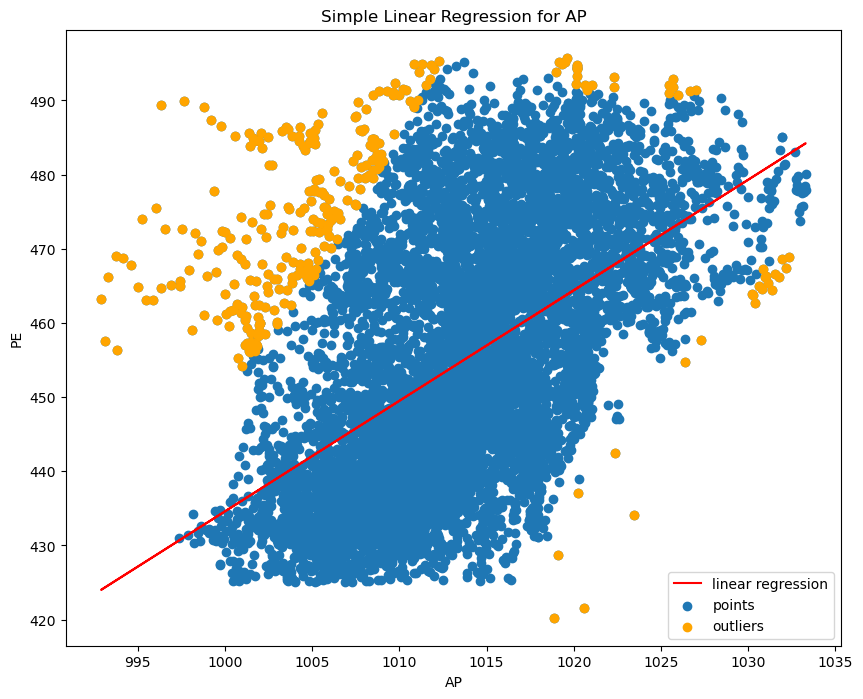

In [8]:
x3 = df['AP']
y = df['PE']
x3 =sm.add_constant(x3)
model3 = sm.OLS(y,x3).fit()

influence = model3.get_influence() 
cooks = influence.summary_frame()
outliers = cooks[cooks['cooks_d'] > 4/9568 ].index

predictions = model3.predict(x3) 
print_model = model3.summary()
print(print_model)

print("\nNo of outliers are", len(outliers))

x3 = df['AP']
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x3,predictions, color='red', label="linear regression")
ax.scatter(x3,y, label ="points")
ax.scatter(x3.iloc[outliers], y.iloc[outliers], color = "orange", label = "outliers")
ax.set_xlabel("AP")
ax.set_ylabel("PE")
ax.set_title("Simple Linear Regression for AP")
plt.legend(loc = "lower right")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:09   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

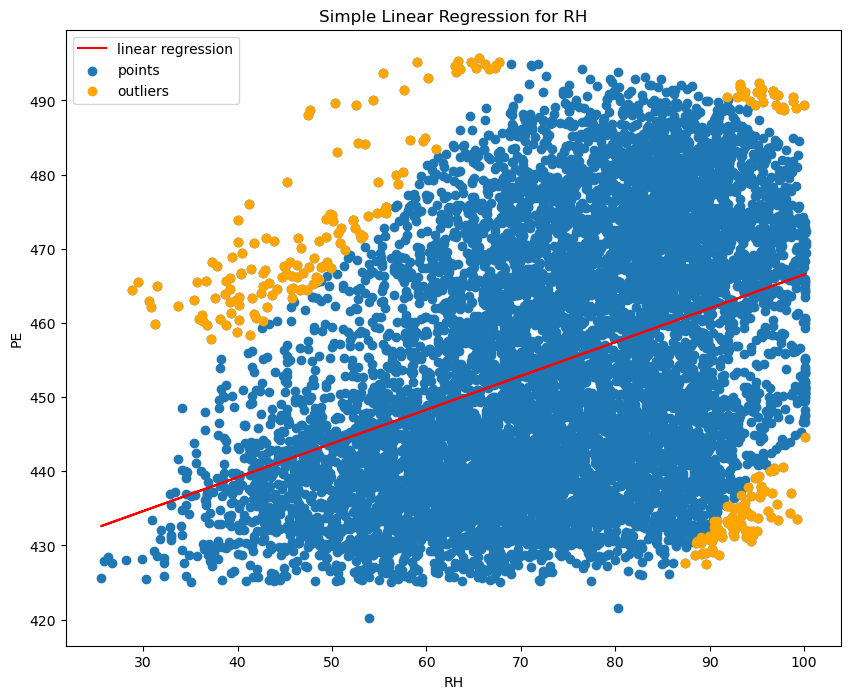

In [9]:
x4 = df['RH']
y = df['PE']
x4 =sm.add_constant(x4)
model4 = sm.OLS(y,x4).fit()

influence = model4.get_influence() 
cooks = influence.summary_frame()
outliers = cooks[cooks['cooks_d'] > 4/9568 ].index

predictions = model4.predict(x4) 
print_model = model4.summary()
print(print_model)

print("\nNo of outliers are", len(outliers))

x4 = df['RH']
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x4,predictions, color='red', label="linear regression")
ax.scatter(x4,y, label ="points")
ax.scatter(x4.iloc[outliers], y.iloc[outliers], color = "orange", label = "outliers")
ax.set_xlabel("RH")
ax.set_ylabel("PE")
ax.set_title("Simple Linear Regression for RH")
plt.legend(loc = "upper left")
plt.show()

All the independent/predictor have a p-value = 0, we can infer that there is an association between independent/predictor variables and dependent/ response variable

## d)

In [10]:
x = df.iloc[:,0:4]
y = df['PE']
x =sm.add_constant(x)
multi_linear_model = sm.OLS(y,x).fit()
print_model = multi_linear_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:09   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Since for all predictors, p- value is zero, we can reject the null hypothesis H0 : βj= 0 and infer an association between predictor variables and response variable

## e)

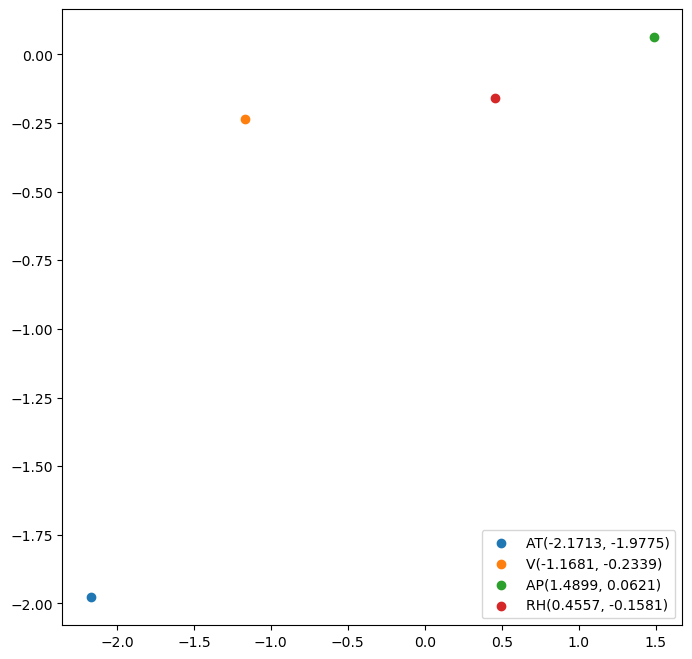

In [11]:

univariant_lr = [model1.params[1],model2.params[1],model3.params[1],model4.params[1]]
multivariant_lr = []
multivariant_lr.extend(multi_linear_model.params[1:])

label = ['AT', 'V', 'AP', 'RH']

fig, ax = plt.subplots(figsize=(8,8))
for i in range (len(univariant_lr)):
    ax.scatter(univariant_lr[i], multivariant_lr[i], label = label[i]+"("+str("{:.4f}".format(univariant_lr[i]))+", " \
        +str("{:.4f}".format(multivariant_lr[i]))+")")
plt.legend(loc = "lower right")
plt.show()

## f)

In [12]:
model = 'PE ~ AT + I(AT**2) + I(AT**3)'
cubic_model_at = smf.ols(formula = model, data = df).fit()
print(cubic_model_at.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:09   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

p-value is zero, thus there is an non-linear association between predictors and response variable

In [13]:
model = 'PE ~ V + I(V**2) + I(V**3)'
cubic_model_v = smf.ols(formula = model, data = df).fit()
print(cubic_model_v.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:09   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

since the p-value of X<sup>2</sup> is high, we can conclude that there is no association. But for others there is an non-linear associatiton between predictor and response. (Assuming threshold to be 0.05)

In [14]:
model = 'PE ~ AP + I(AP**2) + I(AP**3)'
cubic_model_ap = smf.ols(formula = model, data = df).fit()
print(cubic_model_ap.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

p-value is zero, thus there is an non-linear association between predictors and response variable

In [15]:
model = 'PE ~ RH + I(RH**2) + I(RH**3)'
cubic_model_rh = smf.ols(formula = model, data = df).fit()
print(cubic_model_rh.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

p-value is zero, thus there is an non-linear association between predictors and response variable

## g)

In [16]:
model = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
pairwise_model = smf.ols(formula = model, data = df).fit()
print(pairwise_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

AT, AT * AP, V * RH are not significantly important because of high p value, if we set the threshold at 0.05. While other interactions are statistically significant because of small p value

## h)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import mse


df_train, df_test = train_test_split(df, test_size=0.3, random_state = 42)
X_train, y_train = df_train.iloc[:,:4], df_train.iloc[:,-1]

X_test, y_test = df_test.iloc[:,:4], df_test.iloc[:,-1]

In [18]:
model = 'PE ~ AT + V + AP + RH'
base_model = smf.ols(formula = model, data = df_train).fit()

y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

train_mse1 = mse(y_train,y_train_pred)
test_mse1 = mse(y_test, y_test_pred)


print(base_model.summary())
print("\nMean Squared error of train data: " + str(train_mse1))
print("Mean Squared error of test data: " + str(test_mse1))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.8414     11.502     40.673      0.0

In [19]:
# all interactions
model = 'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2)+ I(AP**2) + I(RH**2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
all_model = smf.ols(formula = model, data = df_train).fit()


y_train_pred = all_model.predict(X_train)
y_test_pred = all_model.predict(X_test)

train_mse2 = mse(y_train,y_train_pred)
test_mse2 = mse(y_test, y_test_pred)


print(all_model.summary())

print("\nMean Squared error of train data: " + str(train_mse2))
print("Mean Squared error of test data: " + str(test_mse2))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7664.9809   1429.568     -5.362      0.0

Removing insignificant variables that have p-value > 0.05



In [20]:
model = 'PE ~ AT + V + AP + RH + I(AT**2) + I(AP**2) + I(RH**2) + AT*V + AT*RH + AP*RH'

significant = smf.ols(formula=model, data=df_train).fit()

y_train_pred = significant.predict(X_train)
y_test_pred = significant.predict(X_test)

train_mse3 = mse(y_train,y_train_pred)
test_mse3 = mse(y_test, y_test_pred)


print(significant.summary())

print("\nMean Squared error of train data: " + str(train_mse3))
print("Mean Squared error of test data: " + str(test_mse3))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.046e+04   1091.512     -9.581      0.0

In [21]:
MSE_vals = pd.DataFrame({'Model':['Base Model','Complete Model','Significant Model'],
       'Train Data MSE':[train_mse1, train_mse2, train_mse3],
       'Test Data MSE':[test_mse1, test_mse2, test_mse3]})

print(MSE_vals)

               Model  Train Data MSE  Test Data MSE
0         Base Model       20.580840      21.239857
1     Complete Model       17.887800      18.647312
2  Significant Model       17.917813      18.694346


In [22]:
error_df = pd.DataFrame(columns = ['Model', 'K-Train MSE', 'Min Train MSE', 'K-Test MSE', 'Min Test MSE'])

## i)

In [23]:
#KNN Regression
#Raw data
from sklearn.neighbors import KNeighborsRegressor
k_val = [i for i in range(1,101)]
raw_min_train_k = raw_min_test_k = min_train_mse = min_test_mse = float('inf')

raw_train_mse_list = []
raw_test_mse_list = []
for k in k_val:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)

    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test,y_test_pred)

    raw_train_mse_list.append(train_mse)
    raw_test_mse_list.append(test_mse)

    if train_mse < min_train_mse:
        min_train_mse = train_mse
        raw_min_train_k = k
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        raw_min_test_k = k

error_df = error_df.append({'Model': 'KNN Model', 'K-Train MSE':raw_min_train_k,'Min Train MSE':min_train_mse,
'K-Test MSE':raw_min_test_k, 'Min Test MSE':min_test_mse }, ignore_index=True)
    


In [24]:
print("K val for min mse is :",raw_min_test_k )
print("Min test mse is :",min_test_mse)

K val for min mse is : 5
Min test mse is : 15.726819842563568


In [25]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
norm_X_train = min_max_scaler.fit_transform(X_train)
norm_X_test = min_max_scaler.transform(X_test)

norm_min_train_k = norm_min_test_k = min_train_mse = min_test_mse = float('inf')

norm_train_mse_list = []
norm_test_mse_list = []
for k in k_val:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(norm_X_train, y_train)

    y_train_pred = regressor.predict(norm_X_train)
    y_test_pred = regressor.predict(norm_X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test,y_test_pred)

    norm_train_mse_list.append(train_mse)
    norm_test_mse_list.append(test_mse)

    if train_mse < min_train_mse:
        min_train_mse = train_mse
        norm_min_train_k = k
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        norm_min_test_k = k

error_df = error_df.append({'Model': 'Normalized KNN Model', 'K-Train MSE':norm_min_train_k,'Min Train MSE':min_train_mse,
'K-Test MSE':norm_min_test_k, 'Min Test MSE':min_test_mse }, ignore_index=True)
    

In [26]:
print("K val for normalized min mse is :",norm_min_test_k )
print("Min test mse for normalized is :",min_test_mse)

K val for normalized min mse is : 4
Min test mse for normalized is : 14.291333431295715


In [27]:
print(error_df)

                  Model K-Train MSE  Min Train MSE K-Test MSE  Min Test MSE
0             KNN Model           1            0.0          5     15.726820
1  Normalized KNN Model           1            0.0          4     14.291333


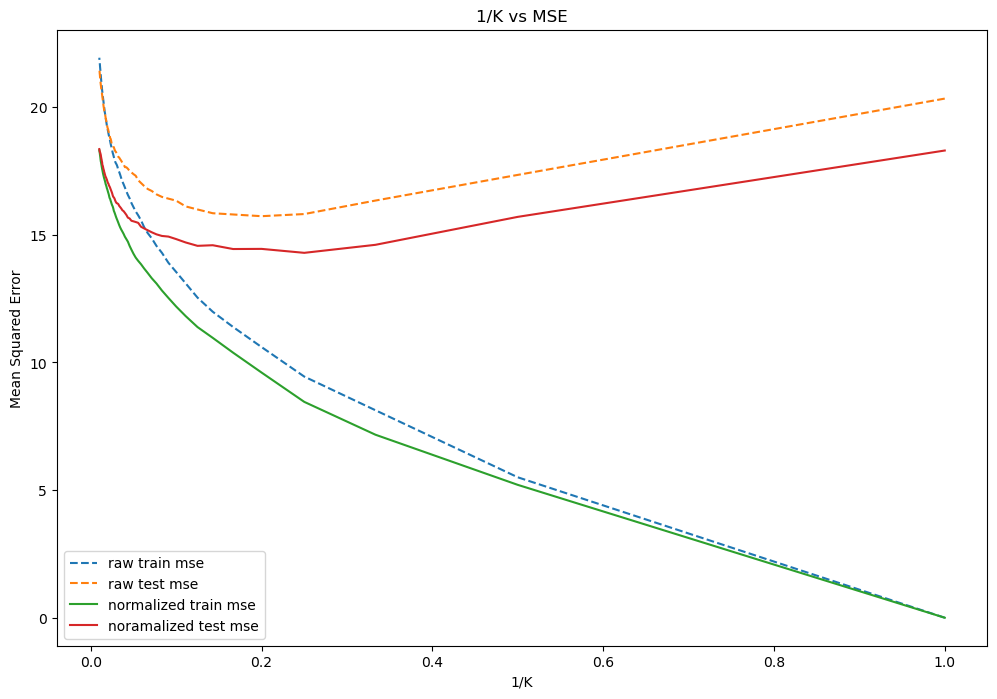

In [28]:
k_inv_list = [1/k for k in k_val]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(k_inv_list, raw_train_mse_list, linestyle='dashed', label = "raw train mse")
ax.plot(k_inv_list, raw_test_mse_list, linestyle='dashed', label = "raw test mse")
ax.plot(k_inv_list, norm_train_mse_list, label = "normalized train mse")
ax.plot(k_inv_list, norm_test_mse_list, label = "noramalized test mse")
ax.set_xlabel("1/K")
ax.set_ylabel("Mean Squared Error")
ax.set_title("1/K vs MSE")
plt.legend(loc = "lower left")
plt.show()

## j)

In [29]:
result_regression=pd.DataFrame([min([test_mse1, test_mse2, test_mse3]),min(raw_test_mse_list),min(norm_test_mse_list)],\
                        index=["Linear Regression Model","KNN Regression Model ","Normalized KNN Regression Model"],\
                        columns=["Test MSE"])
print(result_regression)

                                  Test MSE
Linear Regression Model          18.647312
KNN Regression Model             15.726820
Normalized KNN Regression Model  14.291333


## 2) ISLR 2.4.1

a) The sample size n is extremely large, and the number of predictors p is small.

Ans) A flexible model would perform better because of large sample size, we would better fit the data

b) The number of predictors p is extremely large, and the number
of observations n is small.

Ans) A flexible model would overfit on the data in this scenario and would perform worse than inflexible model.

c)The number of predictors p is extremely large, and the number
of observations n is small.

Ans) A flexible method perform better on non-linear datasets as they have more degree of freedom to approximate a non-linear. For an inflexible model it would be hard to describe non-linear relationship

d)The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely
high.

Ans) A high variance means that the the data is very noise, thus using a flexbile  model would overfit the data. Hence a inflexible data would be much better in this situation


## 3) ISLR 2.4.7

a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

Ans)  
For obs 1: distance = sqrt(3<sup>2</sup>) = 3  
For obs 2: distance = sqrt(2<sup>2</sup>) = 2  
For obs 3: distance = sqrt(1<sup>2</sup> + 3<sup>2</sup>) = 3.16  
for obs 4: distance = sqrt(1<sup>2</sup> + 2<sup>2</sup>) = 2.24  
for obs 5: distance = sqrt((-1)<sup>2</sup> + 1<sup>2</sup>) = 1.41    
for obs 6: distance = sqrt(1<sup>2</sup> + 1<sup>2</sup> + 1<sup>2</sup>) = 1.73 

b) What is our prediction with K = 1? Why?  
Ans) Since K=1, we will look at only 1 nearest datapoint and the closest datapoint is green with euclidean distance = 1.41  

c) What is our prediction with K = 3? Why?  
Ans) With K = 3 we will look at 3 nearest neighbours, that are 2nd observation (Red), 5th observation(Green), 6th observation (Red) with euclidean distanes 2, 1.41, 1.73 respectively. Since the red are in majority we our prediction is red.  

d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?  
Ans)  For highly non-linear boundaries, it is better to have a small K value as smaller K value will have more flexible KNN model. This will also produce a non-linear decision boundry.



## References


https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://note.nkmk.me/en/python-pandas-dataframe-rename/#:~:text=You%20can%20use%20the%20rename,change%20column%2Findex%20name%20individually.&text=Specify%20the%20original%20name%20and,is%20for%20the%20index%20name.

https://datatofish.com/statsmodels-linear-regression/

https://notebook.community/samuelsinayoko/kaggle-housing-prices/research/outlier_detection_statsmodels

https://stackoverflow.com/questions/47388258/how-to-extract-the-regression-coefficient-from-statsmodels-api

https://stackoverflow.com/questions/43777243/how-to-split-a-dataframe-in-pandas-in-predefined-percentages

https://stackoverflow.com/questions/52562664/regression-model-statsmodel-python

https://www.datatechnotes.com/2019/04/regression-example-with-k-nearest.html

https://stackoverflow.com/questions/44118416/pandas-using-variables-to-create-dataframe-with-one-row-and-column-names-from-v

https://stackoverflow.com/questions/51390196/how-to-calculate-cooks-distance-dffits-using-python-statsmodel